# Python

[Centrale Lille, G3 SDIA | M1 DS, University of Lille]

---

## Lab 2 - some practice with Numpy, Scipy, Pandas, h5py and Matplotlib

---

## Guidelines (read carefully before starting)


**Objectives**: acquire some practice with libraries commonly used in data science (`numpy`, `scipy`, `pandas`, `hdf5`, `matplotlib`).

**Guidelines**: after retrieving the resources for the lab on moodle:
- place the .zip archive in a local folder (Computer -> Documents/Python/);
- unzip the archive .zip;
- rename the folder with the convention tp2_Name1_Name2
- duplicate the notebook file and rename it tp2_Name1_Name2.ipynb;
- [**optional, possibly needed if working from Centrale's machines**]
    - create a `lab2` conda environment from the provided `requirement.txt` file
    ```bash
    conda create --name=lab2 --file=requirement.txt --channel conda-forge
    conda activate lab2
    # do not forget to deactivate the environment if needed
    # you can remove the environment once you are done
    conda env remove --name=lab2
    ```
    - launch jupyter notebook (the python environment will be the one from the conda environment `lab2`)
- at the end of the session, do not forget to transfer your work to your own network space if you are working on a machine from the school (do not leave your work on the C: drive).

**Assessment** &#8594; global grade from F to A (A+)

This lab session will be evaluated, based on your answer to the exercises reported in a Jupyter notebook (e.g., this one) and any additional `.py` file produced. Any code produced should be commented whenever appropriate, custom functions and objects documented and unit-tested (see session 1). Figure produced should be clearly annotated (axis, title, legend whenever appropriate).

1. Numerical correctness
2. Implementation clarity (documentation, relevance of the comments)
3. Unit-tests developed whenever appropriate (correctness, relevance)
4. Answers to the questions and overall presentation of the Jupyter notebook.

**Useful references for this lab**:

[1] `numpy`: [lecture notes (1.4.1-1.4.2)](https://scipy-lectures.org/intro/numpy/index.html) and [documentation](https://numpy.org/doc/stable/)

[2] `pandas`: [documentation](https://pandas.pydata.org/docs/getting_started/index.html), [quick tutorial](https://pandas.pydata.org/pandas-docs/version/0.15/10min.html)

[3] `matplotlib`: [lecture notes (1.5)](https://scipy-lectures.org/intro/matplotlib/index.html) and [documentation](https://matplotlib.org/)

[4] `h5py`: [quick start guide](http://docs.h5py.org/en/stable/quick.html#quick)


## <a name="content">Contents</a>
- [Exercise 1: Computing basic statistics](#ex1)
- [Exercise 2: Random variables and histograms](#ex2)
- [Exercise 3: Discrete isotropic total variation](#ex3)
---

In [21]:
%load_ext autoreload
%autoreload 2
!mkdir img

A subdirectory or file img already exists.


---
## <a name="ex1">Exercise 1: Random variables and histograms</a> [(&#8593;)](#content)

In this exercise, we are interested in generating samples from the Gamma distribution $\mathcal{G}(\alpha,\beta)$, of probability density function (pdf)

\begin{equation}
    p(x) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} \exp(-\beta x) \mathbb{1}_{\mathbb{R}_+^*}(x),
\end{equation}

and displaying their histogram. In the following, we consider $(\alpha, \beta) = (9, 2)$.

1\. Set the random seed to a fixed value for reproducibility, and biefly check your instruction works as intended.
> Hint: you may take a look at the following pages: [random module](https://numpy.org/doc/stable/reference/random/index.html?highlight=random#module-numpy.random), [random generator](https://numpy.org/doc/stable/reference/random/generator.html).

Your answers(s)

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from scipy.stats import gamma
import unittest

In [23]:
# generate numpy array with random values. Seed parameter for reproducibility
array = np.random.default_rng(seed=12)  

# set alpha and beta parameters for the distribution
alpha = 9
beta = 2

# adjust numpy array to the gamma distribution
samples = array.gamma(alpha, scale=1/beta, size=1000)

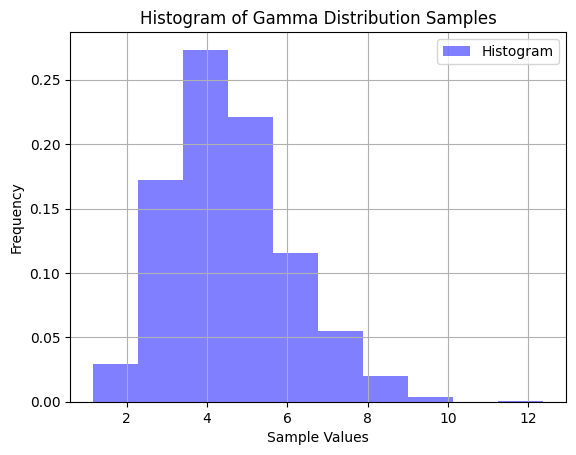

In [24]:
# plot density with pyplot

plt.hist(samples, alpha=0.5,density=True, color='b', label='Histogram')
plt.xlabel('Sample Values')
plt.ylabel('Frequency')
plt.title('Histogram of Gamma Distribution Samples')
plt.legend()
plt.grid(True)
plt.show()

2\. Generate $\approx 10^5$ samples in a vector. Save the vector in a file, `samples.hdf5` or `samples.npy`.
> Warning / hint: 
> - take a careful look at the [documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html?highlight=gamma#numpy.random.gamma) (multiple conventions exist for the definition of the pdf underlying the distribution...);
> - to save data in a `npy` file, take a look at the example reported in the [Numpy documentation](https://numpy.org/doc/stable/reference/generated/numpy.save.html);
> - to save data in a `.h5` file, take a quick look at the [documentation here](https://docs.h5py.org/en/stable/quick.html#quick).

Your answers(s)

In [25]:
# generate approximately 10^5 samples
num_samples = int(1e5)
samples = array.gamma(alpha, scale=1/beta, size=num_samples)

# option 1: Save to an .npy file
np.save("samples.npy", samples)

# option 2: Save to an .hdf5 file
with h5py.File("samples.hdf5", "w") as hf:
    hf.create_dataset("samples", data=samples)

3\. Estimate an histogram of this distribution for a well chosen set of bins, and display it.
> Warnings: 
> - make sure the [histogram](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist) corresponds to a probability density function (pdf);
> - do not forget to include a proper title with names for the axes.

Your answers(s)

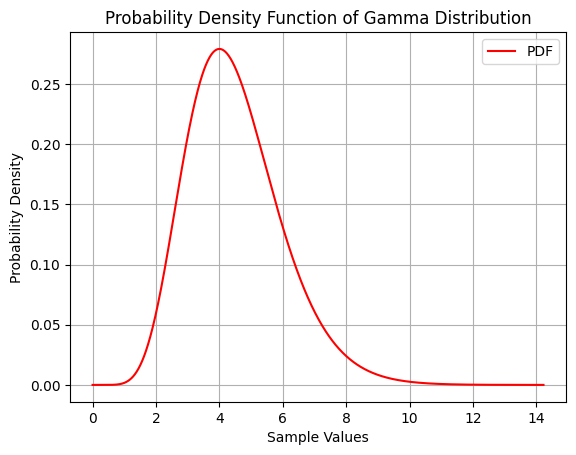

In [26]:
# load the previously generated samples from the .npy
samples = np.load("samples.npy")

# create the histogram values and bins using numpy
hist, bins= np.histogram(samples, bins=30, density=True)

# get the pdf for the Gamma distribution with the same parameters as the generated samples
alpha = 9
beta = 2
x = np.linspace(0, np.max(bins), 1000)  # Generate a range of x values
pdf_values = gamma.pdf(x, a=alpha, scale=1/beta)

# plot the pdf values as a line
plt.plot(x, pdf_values, 'r-', label='PDF')

plt.xlabel('Sample Values')
plt.ylabel('Probability Density')
plt.title('Probability Density Function of Gamma Distribution')
plt.legend()
plt.grid(True)
plt.show()

4\. Overlay the probability density function on the histogram and compare these in a few words. Save the resulting picture in `.png` format.
> Hint: 
> - take a look at the `scipy` [documentation](https://docs.scipy.org/doc/scipy/reference/stats.html) to avoid implementing the pdf from scratch;
> - return the bins in which the histogram is computed, and evaluate the pdf on those points.

Your answers(s)

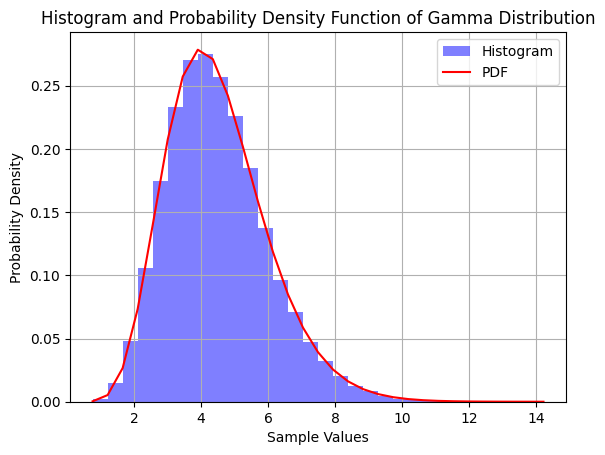

In [27]:
# create the histogram
hist, bins, _ = plt.hist(samples, bins=30, density=True, alpha=0.5, color='b', label='Histogram')

# get the pdf for the Gamma distribution with the same parameters as the generated samples
pdf_values = gamma.pdf(bins, alpha, scale=1/beta)

# plot the histogram
plt.xlabel('Sample Values')
plt.ylabel('Probability Density')
plt.title('Histogram and Probability Density Function of Gamma Distribution')

# overlay the pdf on the histogram
plt.plot(bins, pdf_values, 'r', label='PDF')

# plot legend
plt.legend()

# save the resulting picture in .png format
plt.savefig('img\histogram_with_pdf_gamma_dstr.png')

# show the plot
plt.grid(True)
plt.show()


In [ ]:
'''
Observations:

In the chart above, we can see the histogram made with the actual observations of the gamma distribution. On top of it, the probability density function
adjusts pretty well to the distribution of the data.

This function help us understanding how likely is for each value of the distribution to happen in a continuous range of values.


'''

---
## <a name="ex2">Exercise 2: Basic statistics with `pandas`</a> [(&#8593;)](#content)

In this second exercise, we focus on computing basic statistics, and applying linear regression to a small data set. These data are gathered in the following table, which gives the infant mortality (`X`) and the gross national product per inhabitant (`Y`) of 12 european countries :

| `X` | 190 | 128 | 180 | 212 | 56 | 192 | 68 | 98 | 110 | 197 | 181 | 233 |
|-----|-----|-----|-----|----|-----|----|----|-----|-----|-----|-----|-----|
| `Y` |  24 |  28 |  24 | 19 |  37 | 22 | 34 |  25 |  36 |  24 |  20 |  18 |

1\. For `X `and `Y`, compute the median, mean, variance and standard deviation. The data points have already been entered into a `.csv` file stored in `data/data.csv`.
> Hint: 
> - you can directly use `pandas` to load the data into a `DataFrame` ([`pd.read_csv`](https://pandas.pydata.org/docs/reference/frame.html));
> - take a look at the built-in operations available for `DataFrame` objects ([documentation](https://pandas.pydata.org/docs/reference/frame.html));
> - to display a `DataFrame` `f`:
> ```python 
> from IPython.display import display
> display(df)
> ```
> - sort the `DataFrame` with respect to the value of `X` (see [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values)) This will be useful for question 3.

Your answers(s)

In [19]:
import pandas as pd

In [25]:
gross_national_product=pd.read_csv('data\data.csv')

2\. Give the equation of the regression line of `Y` as a function of `X`.
> Hint: 
> - take a look at the functionalities available in `numpy` (e.g., `np.polyfit` and `np.polyval`);
> - if needed, note that you can retrieve the data from the resulting `pandas` `DataFrame` with the `to_numpy()` method.

Your answers(s)

In [31]:
X=gross_national_product['X'].to_numpy()
y=gross_national_product['Y'].to_numpy()

In [35]:
# fit model with dependent and independent variables, using numpy. Linear regression (deg=1)
model=np.polyfit(x=X,y=y,deg=1)

#take model parameters to predict
predict=np.poly1d(model)

# make predictions and add to original dataframe
gross_national_product['Y_hat']=predict(X)

3\. Display the cloud of points and the regression line $Y = f(X)$ on the same figure. Save the figure in `.png` format.

Your answers(s)

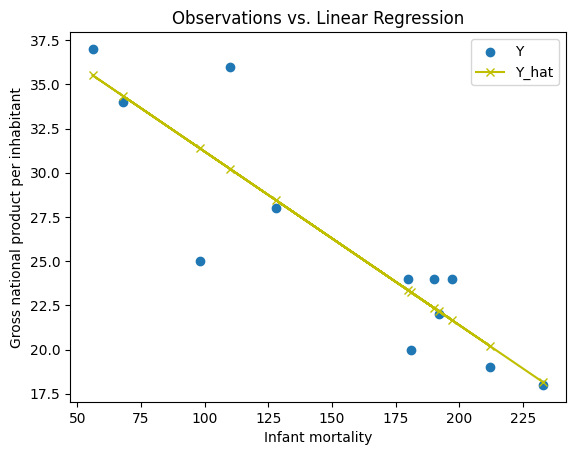

In [52]:
# Plot Y
plt.scatter(X, gross_national_product['Y'], label='Y', marker='o')

# Plot Y hat
plt.plot(X, gross_national_product['Y_hat'], label='Y_hat',color='y', marker='x', linestyle='-')

# Add labels and title
plt.xlabel('Infant mortality')
plt.ylabel('Gross national product per inhabitant')
plt.title('Observations vs. Linear Regression')

# Add a legend
plt.legend()

# Show the plot
plt.show()


---
## <a name="ex3">Exercise 3: Discrete isotropic total variation</a> [(&#8593;)](#content)

This exercise is devoted to the computation of the discrete isotropic total variation (TV) of an input matrix $\mathbf{X} = [\mathbf{x}_n]_{1 \leq n \leq N} \in\mathbb{C}^{M \times N}$, which is particularly useful in Bayesian inference (e.g., for inverse problems) to promote piece-wise smooth solutions. The TV is defined as

\begin{equation*}
    \text{TV}(\mathbf{X}) = \Vert D(\mathbf{X}) \Vert_{1,2} = \sum_{m=1}^M \sum_{n=1}^N \sqrt{[\mathbf{XD}_h]^2_{m,n} + [\mathbf{D}_v\mathbf{X}]^2_{m,n}},
\end{equation*}

where $[\mathbf{Z}]_{m,n}$ denotes the elements in position $(m,n)$ of the matrix $\mathbf{Z}$,

\begin{align*}
    D(X) &= (\mathbf{XD}_h, \mathbf{D}_v\mathbf{X}) \in \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} \\
    %
    \mathbf{XD}_h &= [\mathbf{x}_2-\mathbf{x}_1, \dotsc, \mathbf{x}_N-\mathbf{x}_{N-1}, \mathbf{0}_M] \in \mathbb{C}^{M\times N} \\
    %
    \mathbf{D}_v\mathbf{X} &= [\tilde{\mathbf{x}}_2^T-\tilde{\mathbf{x}}^T_1, \dotsc, \tilde{\mathbf{x}}^T_M-\tilde{\mathbf{x}}^T_{M-1}, \mathbf{0}_N]^T \in \mathbb{C}^{M\times N},
\end{align*}

$\mathbf{x}_n \in \mathbb{C}^{N}$ is the $n$-th column of $\mathbf{X}$, and $\tilde{\mathbf{x}}_m \in \mathbb{C}^{1\times M}$ is the $m$-th row of $\mathbf{X}$. 
The linear operator $D: \mathbb{C}^{M\times N} \rightarrow \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} $ is the discrete gradient operator. The adjoint of $D$, $D^*: \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} \rightarrow \mathbb{C}^{M\times N}$, is given by

\begin{align*}
    (\forall \mathbf{Y} = (\mathbf{Y}_h,\mathbf{Y}_v)), \quad D^*(\mathbf{Y}) &= \mathbf{Y}_h\mathbf{D}^*_h + \mathbf{D}^*_v\mathbf{Y}_v \\
    %
    \mathbf{Y}_h\mathbf{D}^*_h &= \big[-\mathbf{y}_{h,1},- [\mathbf{y}_{h,n}-\mathbf{y}_{h,n-1}]_{2 \leq n \leq N-1}, \mathbf{y}_{h, N-1} \big] \\
    %
    \mathbf{D}^*_v\mathbf{Y}_v &= \big[-\tilde{\mathbf{y}}_{v,1}^T,- [\tilde{\mathbf{y}}_{v,m}^T-\tilde{\mathbf{y}}^T_{v,m-1}]_{2 \leq m \leq M-1}, \tilde{\mathbf{y}}^T_{v, M-1} \big]^T
\end{align*}

where $\mathbf{y}_{h,n}$ is the $n$-th column of $\mathbf{Y}_h$, and $\tilde{\mathbf{x}}_{v,m}$ is the $m$-th row of $\mathbf{Y}_v$.

1\. Using `numpy`, implement a function `gradient2D` to compute the 2D discrete gradient operator $D$ applied to a matrix $\mathbf{X}\in\mathbb{C}^{M \times N}$ (no for loops!). Trigger an error message whenever the input array has more than 2 dimensions. If not clear from the implementation, add a few short comments to explain your code.

> Hint: 
> - to trigger an error, you can for instance use an `assert` statement, or raise an [exception (e.g., `AssertionError`)](https://docs.python.org/3/library/exceptions.html);
> - only a few operations are needed: computing vertical differences, horizontal differences, and possibly a concatenation of matrices into a single tensor (= n-dimensional array);
> - possibly useful functions: `np.diff`, `np.c_`, `np.r_` (or `np.concatenate`). 

Your answers(s)

In [3]:
def gradient2D(X):
    """
    Compute the 2D discrete gradient operator D applied to a matrix X.

    Parameters:
    - X: numpy array, input matrix of shape (M, N).

    Returns:
    - D_X: tuple of two numpy arrays, (D_h(X), D_v(X)).
    """

    # Check if the input array has more than 2 dimensions
    assert X.ndim <= 2, "Input array should have at most 2 dimensions."

    # Compute horizontal gradient D_h(X)
    if X.ndim == 1:
        D_h_X = np.diff(X)
    else:
        D_h_X = np.diff(X, axis=1)
    
    # Compute vertical gradient D_v(X)
    if X.ndim == 1:
        D_v_X = np.diff(X, axis=0)
    else:
        D_v_X = np.diff(X, axis=0)

    # Return the tuple (D_h(X), D_v(X))
    return D_h_X, D_v_X


# Example usage:
M, N = 3, 4
X = np.random.rand(M, N)
D_h_X, D_v_X = gradient2D(X)

2\. Implement a unit-test to validate the behaviour of the `gradient2D` function. For instance, you can check the format of the output, and test the result when the functioni s evaluated on a constant matrix (for both a square and a non-square input matrix). Run the unit-test from the present Jupyter notebook.

Your answers(s)

In [4]:
class TestGradient2D(unittest.TestCase):
    def test_output_format(self):
        # test the format of the output (tuple of two numpy arrays)
        M, N = 3, 4
        X = np.random.rand(M, N)
        D_h_X, D_v_X = gradient2D(X)
        self.assertIsInstance(D_h_X, np.ndarray)
        self.assertIsInstance(D_v_X, np.ndarray)
        self.assertEqual(D_h_X.shape, (M, N - 1))  # check the shape of horizontal gradient
        self.assertEqual(D_v_X.shape, (M - 1, N))  # check the shape of vertical gradient

    def test_constant_matrix(self):
        # test the result when the function is evaluated on a constant matrix
        M, N = 3, 3
        constant_value = 5.0
        X = np.full((M, N), constant_value)
        D_h_X, D_v_X = gradient2D(X)
        expected_h_gradient = np.zeros((M, N - 1))
        expected_v_gradient = np.zeros((M - 1, N))
        np.testing.assert_array_almost_equal(D_h_X, expected_h_gradient)
        np.testing.assert_array_almost_equal(D_v_X, expected_v_gradient)

# create a test suite and run the tests
suite = unittest.TestLoader().loadTestsFromTestCase(TestGradient2D)
unittest.TextTestRunner(verbosity=2).run(suite)


test_constant_matrix (__main__.TestGradient2D.test_constant_matrix) ... ok
test_output_format (__main__.TestGradient2D.test_output_format) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.004s

OK


<unittest.runner.TextTestResult run=2 errors=0 failures=0>

3\. Document the function `gradient2D` with an appropriate docstring (see session 1).

Your answers(s)

In [5]:
def gradient2D(X):
    """
    Compute the 2D discrete gradient operator D applied to a matrix X.

    The discrete gradient operator D calculates both horizontal (D_h) and vertical (D_v) gradients of a 2D matrix X.

    Parameters:
    - X: numpy array, input matrix of shape (M, N).

    Returns:
    - D_X: tuple of two numpy arrays, (D_h(X), D_v(X)).
    
    - D_h(X): numpy array of shape (M, N-1), representing the horizontal gradient.
    - D_v(X): numpy array of shape (M-1, N), representing the vertical gradient.

    Example:
    M, N = 3, 4
    X = np.random.rand(M, N)
    D_h_X, D_v_X = gradient2D(X)
    """
    # check if the input array has more than 2 dimensions
    assert X.ndim <= 2, "Input array should have at most 2 dimensions."

    # compute horizontal gradient D_h(X)
    if X.ndim == 1:
        D_h_X = np.diff(X)
    else:
        D_h_X = np.diff(X, axis=1)
    
    # compute vertical gradient D_v(X)
    if X.ndim == 1:
        D_v_X = np.diff(X, axis=0)
    else:
        D_v_X = np.diff(X, axis=0)

    # return the tuple (D_h(X), D_v(X))
    return D_h_X, D_v_X


4\. Using 1., define a function `tv` to compute $\text{TV}(\mathbf{X})$, $\mathbf{X}\in\mathbb{C}^{M \times N}$. Write a unit-test and document your function.

Your answers(s)

In [6]:
def tv(X):
    """
    Compute the total variation (TV) of a 2D matrix X.

    The TV is calculated as the sum of the magnitudes of the discrete horizontal and vertical gradients.

    Parameters:
    - X: numpy array, input matrix of shape (M, N).

    Returns:
    - tv_value: float, the total variation of X.

    Example:
    M, N = 3, 4
    X = np.random.rand(M, N)
    total_variation = tv(X)
    
    """
    # Calculate the discrete gradients
    D_h_X, D_v_X = gradient2D(X)

    # Compute the total variation (TV) as the sum of the magnitudes
    tv_value = np.sum(np.abs(D_h_X)) + np.sum(np.abs(D_v_X))

    return tv_value

# Create a test suite and run the tests
class TestTV(unittest.TestCase):
    def test_tv_value(self):
        # Test the computed TV value on a known matrix
        X = np.array([[1, 2, 3],
                    [4, 5, 6],
                    [7, 8, 9]])
        # Expected TV: |1-2| + |2-3| + |4-5| + |5-6| + |7-8| + |8-9| +
        #              |1-4| + |4-7| + |2-5| + |5-8| + |3-6| + |6-9| = 24
        self.assertAlmostEqual(tv(X), 24.0, places=6)



# Run the unit tests
unittest.TextTestRunner().run(unittest.TestLoader().loadTestsFromTestCase(TestTV))


.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

5\. Implement a function `gradient2D_adjoint` to compute $D^*(\mathbf{Y})$, the adjoint of the 2D discrete gradient operator $D$ applied to $\mathbf{Y}\in\mathbb{C}^{M \times N}\times \mathbb{C}^{M \times N}$. Add a few short comments to explain your code whenever appropriate.

Your answers(s)

In [7]:
def gradient2D_adjoint(Y):
    
    """
    Compute the adjoint of the 2D discrete gradient operator D^*(Y).

    The adjoint operator D^* calculates the adjoint of the discrete horizontal (D_h) and vertical (D_v) gradients
    applied to Y.

    Parameters:
    - Y: tuple of two numpy arrays, (Y_h, Y_v).
        - Y_h: numpy array of shape (M, N-1), representing the horizontal gradient.
        - Y_v: numpy array of shape (M-1, N), representing the vertical gradient.

    Returns:
    - X: numpy array, the adjoint operator D^*(Y) applied to Y, of shape (M, N).

    Example:
    M, N = 3, 4
    Y_h = np.random.rand(M, N-1)
    Y_v = np.random.rand(M-1, N)
    X = gradient2D_adjoint((Y_h, Y_v))
    """
    # Unpack the horizontal and vertical gradients from the input tuple
    Y_h, Y_v = Y

    # Calculate the horizontal adjoint D_h^*(Y_h)
    if Y_h.ndim == 1:
        D_h_adj_Y_h = np.diff(np.pad(Y_h, ((0, 0), (0, 1))), axis=1)
    else:
        D_h_adj_Y_h = np.diff(np.pad(Y_h, ((0, 0), (0, 1))), axis=1)

    # Calculate the vertical adjoint D_v^*(Y_v)
    if Y_v.ndim == 1:
        D_v_adj_Y_v = np.diff(np.pad(Y_v, ((0, 1), (0, 0))), axis=0)
    else:
        D_v_adj_Y_v = np.diff(np.pad(Y_v, ((0, 1), (0, 0))), axis=0)

    # Combine the horizontal and vertical adjoints to get D^*(Y)
    X = D_h_adj_Y_h + D_v_adj_Y_v

    return X



6\. Implement a unit-test to validate `gradient2D_adjoint`, e.g., by checking the size of the output from the function and verifying that `gradient2D_adjoint` is adjoint to `gradient2D`, i.e., for any $\mathbf{X}\in\mathbb{C}^{M \times N}$ and $\mathbf{Y}\in\mathbb{C}^{M \times N}\times \mathbb{C}^{M \times N}$:

\begin{equation}
    \forall \mathbf{X} \in \mathbb{C}^{M \times N}, \mathbf{Y} = (\mathbf{Y}_h, \mathbf{Y}_v) \in \mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}, \;
    %
    \langle D(\mathbf{X}), \mathbf{Y} \rangle_{\mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}} = \langle \mathbf{X}, D^*(\mathbf{Y}) \rangle_{\mathbb{C}^{M \times N}}, 
\end{equation}

where 

\begin{align}
    &\forall \mathbf{U}, \mathbf{V} \in \mathbb{C}^{M \times N}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{M \times N}} = \text{Tr}(\mathbf{U}^H \mathbf{V}) = \sum_{m=1}^M \sum_{n=1}^N u_{m,n}^* v_{m,n}, \\
    &\forall \mathbf{U} = (\mathbf{U}_h, \mathbf{U}_v), \mathbf{V} = (\mathbf{V}_h, \mathbf{V}_v) \in \mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}} = \langle \mathbf{U}_h, \mathbf{V}_h \rangle_{\mathbb{C}^{M \times N}} + \langle \mathbf{U}_v, \mathbf{V}_v \rangle_{\mathbb{C}^{M \times N}}.
\end{align}

> Hint: to verify `gradient2D_adjoint` is the adjoint of `gradient2D`, evaluate the scalar products above for randomly drawn matrices. Set the random generator to a known state for reproducibility (see [Exercise 1](#ex1)).

Your answers(s)

In [ ]:
class TestAdjoint(unittest.TestCase):
    def setUp(self):
        # Set the random seed for reproducibility
        np.random.seed(0)
    
    def test_adjoint_property(self):
        # Generate a random matrix X
        M, N = 3, 4
        X = np.random.rand(M, N)
        
        # Generate random horizontal gradient Y_h
        Y_h = np.random.rand(M, N-1)
        
        # Calculate the scalar product <D_h(X), Y_h> using gradient2D
        DX_h = gradient2D(X)
        
        # Calculate the scalar product <X, D*_h(Y_h)> using gradient2D_adjoint for horizontal gradient
        DY_h = gradient2D_adjoint((Y_h,))
        
        # Calculate the scalar product <D_h(X), Y_h> and <X, D*_h(Y_h)>
        scalar_product_1_h = np.sum(np.conj(DX_h) * Y_h)
        scalar_product_2_h = np.sum(X * np.conj(DY_h[0]))  # Access the first element of the tuple
        
        # Check if the scalar products are equal
        self.assertAlmostEqual(scalar_product_1_h, scalar_product_2_h, places=6)

# Create a test suite
test_suite = unittest.TestLoader().loadTestsFromTestCase(TestAdjoint)

# Create a test runner and run the tests
test_runner = unittest.TextTestRunner()
test_runner.run(test_suite)


[Bonus, **optional**]. Generalize the `gradient2D` to any number of dimensions ($\mathbf{X} \in \mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}$), i.e., by returning tensors obtained by computing differences along each of its dimensions.
> Hint: 
> - you may use a loops here, and/or list comprehension. Using slice objects (see [np.s_](https://numpy.org/doc/stable/reference/generated/numpy.s_.html?highlight=s_#numpy.s_) and [this page](https://stackoverflow.com/questions/24432209/python-index-an-array-using-the-colon-operator-in-an-arbitrary-dimension)) can be an interesting option.
>
> - the definition of the scalar product above can be extended to the case of tensors as follows:
> \begin{equation}
    \mathbf{U}, \mathbf{V} \in \mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}} =  \sum_{n_1 = 1}^{N_1}  \sum_{n_2 = 1}^{N_2} \dotsc \sum_{n_p = 1}^{N_p} u_{n_1, n_2, \dotsc, n_p}^* v_{n_1, n_2, \dotsc, n_p}   
\end{equation}

Your answers(s)

## Reference

```bibtex
@article{condat:hal-01309685,
  TITLE = {{Discrete Total Variation: New Definition and Minimization}},
  AUTHOR = {Condat, Laurent},
  URL = {https://hal.archives-ouvertes.fr/hal-01309685},
  JOURNAL = {{SIAM Journal on Imaging Sciences}},
  PUBLISHER = {{Society for Industrial and Applied Mathematics}},
  VOLUME = {10},
  NUMBER = {3},
  PAGES = {1258--1290},
  YEAR = {2017},
  MONTH = Aug,
  DOI = {10.1137/16M1075247},
  KEYWORDS = { variational image processing ; total variation ;  finite-difference schemes ;  coarea formula},
  PDF = {https://hal.archives-ouvertes.fr/hal-01309685v3/file/Condat-newTV.pdf},
  HAL_ID = {hal-01309685},
  HAL_VERSION = {v3},
}
```
